In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import numpy as np
from IPython.display import Image  
from sklearn import tree
import pydotplus
import itertools

In [55]:
df1 = pd.read_csv('/Users/irene/Desktop/Курсовая/res_measures_simple1000_1.csv',
                       sep=';', encoding='utf-8', names = 'h')

In [56]:
df1[['name', 'grade1', 'grade2', 'num_tokens', 'num_acl', 'num_acl_relcl', 'num_advcl',
'num_sents', 'num_cl', 'num_tu', 'num_ctu',
'num_coord', 'poss', 'prep_ph', 'adj_n', 'ger_inf',
'part_n', 'n_inf', 'num_vp',
'min_depth', 'max_depth', 'num_np', 'nan']] = df1['h'].str.split('\t',expand=True)

In [57]:
df2 = pd.read_csv('/Users/irene/Desktop/Курсовая/res_measures_simple1000_2.csv',
                       sep=';', encoding='utf-8', names = 'h')

In [58]:
df2[['name', 'grade1', 'grade2', 'num_tokens', 'num_acl', 'num_acl_relcl', 'num_advcl',
'num_sents', 'num_cl', 'num_tu', 'num_ctu',
'num_coord', 'poss', 'prep_ph', 'adj_n', 'ger_inf',
'part_n', 'n_inf', 'num_vp',
'min_depth', 'max_depth', 'num_np', 'nan']] = df2['h'].str.split('\t',expand=True)

In [59]:
def best_non(row):
    if row['grade2'] == 'best':
        val = 'best'
    else:
        val = 'nonbest'
    return val
df1['mark_best_nonbest'] = df1.apply(best_non, axis=1)
df2['mark_best_nonbest'] = df2.apply(best_non, axis=1)

In [60]:
df1 = df1.drop(['h','nan'], axis=1)
df2 = df2.drop(['h','nan'], axis=1)

In [61]:
#df1 = df1.drop(['h','nan', 'grade1', 'name', 'grade2'], axis=1)
#df2 = df2.drop(['h','nan', 'grade1', 'name', 'grade2'], axis=1)

In [62]:
df1.shape[0]

1056

In [63]:
one = [1] * df1.shape[0]
two = [2] * df2.shape[0]

In [64]:
len(one)

1056

In [65]:
df1 = df1.assign(type_ess=one)
df2 = df2.assign(type_ess=two)

In [66]:
df1.head()

,name,grade1,grade2,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,...,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np,mark_best_nonbest,type_ess
0,/Users/irene/Downloads/exam/exam2014/AAl_10_1.txt,55,aver,186,2,3,2,7,13,13,...,6,12,2,0,12,4,6,67,nonbest,1
1,/Users/irene/Downloads/exam/exam2014/AAl_11_1.txt,50,aver,195,4,2,1,10,14,14,...,1,3,1,0,17,3,8,60,nonbest,1
2,/Users/irene/Downloads/exam/exam2014/AAl_13_1.txt,75,best,271,5,1,3,11,23,23,...,3,6,3,1,19,2,8,66,best,1
3,/Users/irene/Downloads/exam/exam2014/AAl_14_1.txt,55,aver,218,3,0,1,10,14,14,...,3,2,0,0,12,3,11,78,nonbest,1
4,/Users/irene/Downloads/exam/exam2014/AAl_18_1.txt,60,aver,190,2,0,3,9,13,13,...,4,2,1,2,15,3,6,64,nonbest,1


In [67]:
df2.head()

,name,grade1,grade2,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,...,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np,mark_best_nonbest,type_ess
0,/Users/irene/Downloads/exam/exam2014/AAl_10_2.txt,65,aver,292,7,2,7,11,32,29,...,2,15,1,2,28,3,6,68,nonbest,2
1,/Users/irene/Downloads/exam/exam2014/AAl_16_2.txt,55,aver,282,4,1,7,13,31,30,...,5,16,0,1,30,1,7,72,nonbest,2
2,/Users/irene/Downloads/exam/exam2014/AAl_19_2.txt,60,aver,274,8,3,5,12,27,27,...,7,13,1,2,28,2,10,75,nonbest,2
3,/Users/irene/Downloads/exam/exam2014/AAl_20_2.txt,60,aver,243,2,1,8,12,31,31,...,2,15,0,0,30,2,8,67,nonbest,2
4,/Users/irene/Downloads/exam/exam2014/AAl_22_2.txt,55,aver,361,7,3,7,18,35,35,...,6,19,0,2,46,3,8,102,nonbest,2


In [68]:
res = df1.append(df2, ignore_index=True)

In [70]:
res.head()

,name,grade1,grade2,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,...,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np,mark_best_nonbest,type_ess
0,/Users/irene/Downloads/exam/exam2014/AAl_10_1.txt,55,aver,186,2,3,2,7,13,13,...,6,12,2,0,12,4,6,67,nonbest,1
1,/Users/irene/Downloads/exam/exam2014/AAl_11_1.txt,50,aver,195,4,2,1,10,14,14,...,1,3,1,0,17,3,8,60,nonbest,1
2,/Users/irene/Downloads/exam/exam2014/AAl_13_1.txt,75,best,271,5,1,3,11,23,23,...,3,6,3,1,19,2,8,66,best,1
3,/Users/irene/Downloads/exam/exam2014/AAl_14_1.txt,55,aver,218,3,0,1,10,14,14,...,3,2,0,0,12,3,11,78,nonbest,1
4,/Users/irene/Downloads/exam/exam2014/AAl_18_1.txt,60,aver,190,2,0,3,9,13,13,...,4,2,1,2,15,3,6,64,nonbest,1


In [71]:
gr1 = res['grade1']
gr2 = res['grade2']
names = res['name']

In [72]:
res = res.drop(['grade1', 'name', 'grade2'], axis=1)

In [73]:
y = res.values[:, res.shape[1]-2]

In [74]:
y

array(['nonbest', 'nonbest', 'best', ..., 'nonbest', 'nonbest', 'nonbest'],
      dtype=object)

In [75]:
X_df_best_non = res.drop(['mark_best_nonbest'], axis=1)
X_df_best_non[X_df_best_non.columns] = X_df_best_non[X_df_best_non.columns].astype(float)
X = X_df_best_non.values[:, 0:X_df_best_non.shape[1]]

In [19]:
from sklearn.model_selection import StratifiedKFold

In [20]:
skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=0)
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays )', "TEST (", len(test_index), 'essays )')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 1694 essays ) TEST ( 424 essays )
TRAIN ( 1694 essays ) TEST ( 424 essays )
TRAIN ( 1694 essays ) TEST ( 424 essays )
TRAIN ( 1694 essays ) TEST ( 424 essays )
TRAIN ( 1696 essays ) TEST ( 422 essays )


In [21]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 101), 'max_features': range(1, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [22]:
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.12      0.18      0.14        33
    nonbest       0.93      0.89      0.91       389

avg / total       0.86      0.83      0.85       422



In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.coolwarm):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

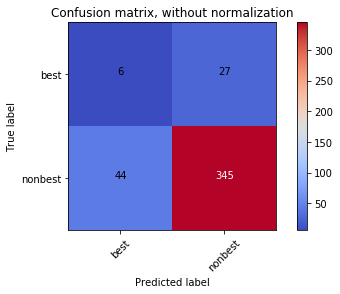

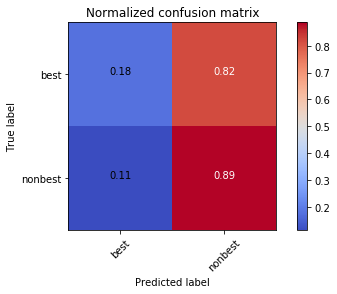

In [24]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [25]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.83


In [26]:
import collections

In [27]:
def imp(clf_grid, feature_names):
    importances = clf_grid.best_estimator_.feature_importances_
    #print(clf_grid.best_estimator_)
    if isinstance(clf_grid.best_estimator_, collections.Iterable):
        std = np.std([clf_grid.best_estimator_.feature_importances_ for tree in clf_grid.best_estimator_],
             axis=0)
    else:
        std = clf1.best_estimator_.feature_importances_
    #print(std)
    indices = np.argsort(importances)[::-1]
    d = {'importance': importances, 'name_feature': feature_names}
    
    # Print the feature ranking
    df_importance = pd.DataFrame(data=d)
    df_importance = df_importance.sort_values(by=['importance'], ascending=False)
    print("Feature ranking:")

    print(df_importance)

    # Plot the feature importances of the forest
    plt.figure(figsize=(10,5))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
       color="g")
    plt.xticks(range(X.shape[1]), df_importance['name_feature'], rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.show()

Feature ranking:
    importance   name_feature
0     0.213114     num_tokens
12    0.113913        ger_inf
3     0.072241      num_advcl
11    0.061828          adj_n
14    0.059024          n_inf
9     0.055448           poss
4     0.053656      num_sents
15    0.050320         num_vp
1     0.046752        num_acl
18    0.044826         num_np
10    0.043147        prep_ph
17    0.043049      max_depth
2     0.026284  num_acl_relcl
5     0.022505         num_cl
13    0.022310         part_n
7     0.019651        num_ctu
16    0.018534      min_depth
8     0.018196      num_coord
6     0.015201         num_tu
19    0.000000       type_ess


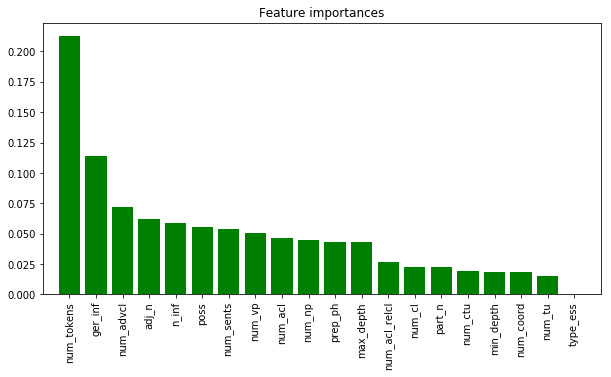

In [28]:
imp(clf1, X_df_best_non.columns)

In [29]:
y_test_1 = []
for x in y_test:
    if x == 'best':
        y_test_1.append(1)
    else:
        y_test_1.append(0)

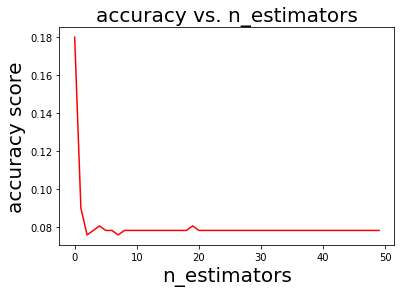

In [30]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [31]:
parameters = {
    'max_features': range(1, X_df_best_non.shape[1]),
    'max_depth' : range(1, 30),
}
clf2 = RandomForestClassifier(n_estimators=10, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf2, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 20), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [32]:
y_pred = clf2.predict(X_test)

In [33]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.25      0.03      0.05        33
    nonbest       0.92      0.99      0.96       389

avg / total       0.87      0.92      0.89       422



Feature ranking:
    importance   name_feature
0     0.088639     num_tokens
12    0.077216        ger_inf
18    0.069744         num_np
15    0.062361         num_vp
10    0.061096        prep_ph
9     0.059564           poss
3     0.055821      num_advcl
4     0.054834      num_sents
6     0.051628         num_tu
8     0.051064      num_coord
5     0.051057         num_cl
17    0.049042      max_depth
1     0.046980        num_acl
14    0.046677          n_inf
11    0.044838          adj_n
2     0.036524  num_acl_relcl
13    0.032094         part_n
16    0.030709      min_depth
7     0.022210        num_ctu
19    0.007902       type_ess


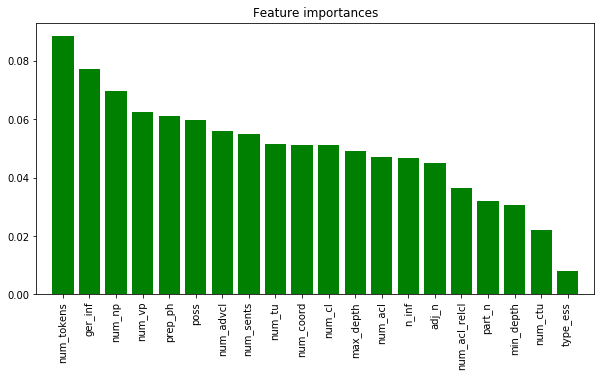

In [34]:
imp(clf2, X_df_best_non.columns)

In [35]:
parameters = {'C': np.logspace(0, 4, 10)}
clf3 = LogisticRegression(penalty='l1')
clf3 = GridSearchCV(clf3, parameters)
clf3.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
y_pred = clf3.predict(X_test)

In [37]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.92


In [38]:
def imp2(clf_grid, feature_names):
    importances = 100.0 * (abs(clf_grid.coef_[0]) / abs(clf_grid.coef_[0]).max())
    #print(std)
    indices = np.argsort(importances)[::-1]
    d = {'importance': importances, 'name_feature': feature_names}
    
    # Print the feature ranking
    df_importance = pd.DataFrame(data=d)
    df_importance = df_importance.sort_values(by=['importance'], ascending=False)
    print("Feature ranking:")

    print(df_importance)

    # Plot the feature importances of the forest
    plt.figure(figsize=(10,5))
    plt.title("Relative feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
       color="g")
    plt.xticks(range(X.shape[1]), df_importance['name_feature'], rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.show()

In [39]:
clf3 = LogisticRegression(penalty='l1', C=clf3.best_params_['C'])
clf3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Feature ranking:
    importance   name_feature
19  100.000000       type_ess
7    25.687314        num_ctu
13   24.107942         part_n
3    15.726595      num_advcl
14    8.500463          n_inf
4     7.171998      num_sents
8     4.329263      num_coord
15    3.979253         num_vp
2     2.747870  num_acl_relcl
12    2.700894        ger_inf
5     2.692555         num_cl
9     2.567483           poss
11    2.259486          adj_n
0     2.130902     num_tokens
10    1.774551        prep_ph
1     1.383235        num_acl
17    1.021383      max_depth
16    0.691367      min_depth
18    0.116723         num_np
6     0.000000         num_tu


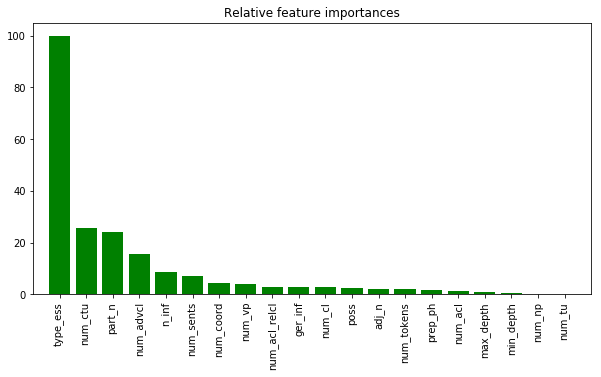

In [40]:
imp2(clf3, X_df_best_non.columns)

In [41]:
res.shape

(2118, 21)

In [76]:
res = res.drop(['type_ess'], axis=1)

In [77]:
best = res[res['mark_best_nonbest'] == 'best']
nonbest = res[res['mark_best_nonbest'] == 'nonbest']

In [78]:
best.shape

(169, 20)

In [79]:
nonbest.shape

(1949, 20)

In [80]:
def count_accuracy(df):
    y = df.values[:, df.shape[1]-1]
    X_df_best_non = df.drop(['mark_best_nonbest'], axis=1)
    X_df_best_non[X_df_best_non.columns] = X_df_best_non[X_df_best_non.columns].astype(float)
    X = X_df_best_non.values[:, 0:X_df_best_non.shape[1]]
    skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=0)
    #skf.get_n_splits(X, y)
    for train_index, test_index in skf.split(X, y):
        #print("TRAIN (", len(train_index), 'essays )', "TEST (", len(test_index), 'essays )')
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    parameters = {'max_depth': range(1, 101),'max_features': range(1, X_df_best_non.shape[1])}
    clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
    clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_test)
    return round(accuracy_score(y_test, y_pred), 2)

In [81]:
def count_accuracy2(df):
    y = df.values[:, df.shape[1]-1]
    X_df_best_non = df.drop(['mark_best_nonbest'], axis=1)
    X_df_best_non[X_df_best_non.columns] = X_df_best_non[X_df_best_non.columns].astype(float)
    X = X_df_best_non.values[:, 0:X_df_best_non.shape[1]]
    skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=0)
    #skf.get_n_splits(X, y)
    for train_index, test_index in skf.split(X, y):
        #print("TRAIN (", len(train_index), 'essays )', "TEST (", len(test_index), 'essays )')
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    parameters = {'max_depth': range(1, 101),'max_features': range(1, X_df_best_non.shape[1])}
    clf1 = RandomForestClassifier()
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_test)
    return round(accuracy_score(y_test, y_pred), 2)

In [82]:
best_num = [16]*9
best_num.append(25)
print(sum(best_num))
nonbest_num = [195]*9
nonbest_num.append(194)
print(sum(nonbest_num))

169
1949


In [83]:
nonbest.head()

,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,num_coord,poss,prep_ph,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np,mark_best_nonbest
0,186,2,3,2,7,13,13,0,1,13,34,6,12,2,0,12,4,6,67,nonbest
1,195,4,2,1,10,14,14,0,5,19,36,1,3,1,0,17,3,8,60,nonbest
3,218,3,0,1,10,14,14,0,4,27,46,3,2,0,0,12,3,11,78,nonbest
4,190,2,0,3,9,13,13,0,2,18,39,4,2,1,2,15,3,6,64,nonbest
5,202,4,1,3,11,16,16,0,4,18,36,4,5,2,1,14,3,6,65,nonbest


In [84]:
best.head()

,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_ctu,num_coord,poss,prep_ph,adj_n,ger_inf,part_n,n_inf,num_vp,min_depth,max_depth,num_np,mark_best_nonbest
2,271,5,1,3,11,23,23,0,8,21,33,3,6,3,1,19,2,8,66,best
9,200,0,0,1,10,14,14,0,5,25,44,2,6,0,0,12,3,10,77,best
12,217,2,1,1,13,19,19,0,4,13,37,3,11,1,1,23,2,5,65,best
36,194,0,2,2,8,17,17,0,6,26,34,1,4,0,0,15,4,8,65,best
46,165,2,0,4,8,12,12,0,4,20,20,0,3,0,0,8,4,7,43,best


In [85]:
best.index.values

array([   2,    9,   12,   36,   46,   78,   98,  100,  141,  146,  201,
        244,  301,  399,  411,  442,  474,  480,  486,  491,  493,  497,
        499,  501,  503,  515,  517,  524,  534,  539,  552,  557,  563,
        705,  713,  760,  761,  791,  806,  807,  808,  809,  814,  819,
        820,  822,  823,  824,  830,  835,  839,  841,  845,  848,  853,
        855,  860,  863,  864,  866,  923,  932,  949,  986, 1028, 1029,
       1030, 1032, 1034, 1037, 1042, 1043, 1046, 1051, 1053, 1054, 1063,
       1079, 1123, 1128, 1158, 1164, 1166, 1167, 1176, 1183, 1234, 1242,
       1245, 1253, 1289, 1331, 1333, 1371, 1419, 1421, 1423, 1425, 1428,
       1430, 1446, 1459, 1510, 1532, 1535, 1537, 1538, 1542, 1547, 1550,
       1551, 1598, 1603, 1627, 1629, 1638, 1652, 1656, 1664, 1712, 1739,
       1789, 1804, 1808, 1810, 1824, 1835, 1837, 1838, 1841, 1842, 1843,
       1845, 1846, 1848, 1851, 1855, 1861, 1863, 1869, 1871, 1873, 1875,
       1878, 1879, 1881, 1882, 1884, 1888, 1889, 18

In [86]:
names[2]

'/Users/irene/Downloads/exam/exam2014/AAl_13_1.txt'

In [91]:
s = set([1, 2, 4])
k = set([1, 2, 4, 6, 8])
print(s-k)

set()


In [98]:
summ_f = 0
summ_s = 0
accuracies = []
shapes = []
d = {}
adds = {}
for x in range(10):
    summ_f = summ_f + nonbest_num[x]
    summ_s = summ_s + best_num[x]
    f = nonbest.iloc[0:summ_f]
    s = best.iloc[0:summ_s]
    r = f.append(s, ignore_index=True)
    print('-----')
    print('*',r.shape[0])
    ind_f = f.index.values
    ind_s = s.index.values
    #print(len(ind_f))
    #print(len(ind_s))
    d[r.shape[0]] = [[], []]
    for each_f in ind_f:
        d[r.shape[0]][0].append(names[each_f])# nonbest
    for each_s in ind_s:
        d[r.shape[0]][1].append(names[each_s])# best
    #print(len(d[r.shape[0]][1]))
    #print(len(d[r.shape[0]][0]))
    #print(len(set(d[r.shape[0]][1])))
    #print(len(set(d[r.shape[0]][0])))
    #print('nonbest', f.index.values)
    #print('best', s.index.values)
    shapes.append(r.shape[0])
    #print(r.shape[0])
    acc = count_accuracy(r)
    accuracies.append(acc)
#print(d)

-----
* 211
-----
* 422
-----
* 633
-----
* 844
-----
* 1055
-----
* 1266
-----
* 1477
-----
* 1688
-----
* 1899
-----
* 2118


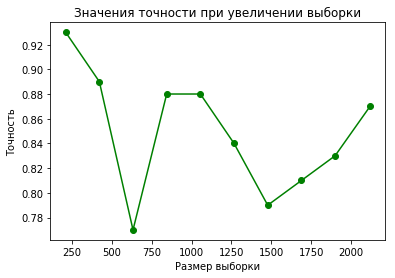

In [99]:
plt.plot(shapes, accuracies, '-go')
plt.title("Значения точности при увеличении выборки")
plt.ylabel('Точность')
plt.xlabel('Размер выборки')
plt.show()

In [123]:
add_new_nonbest = list(set(d[633][0])-set(d[422][0]))#nonbest

In [124]:
len(add_new_nonbest)

195

In [125]:
add_new_best = list(set(d[633][1])-set(d[422][1]))#best

In [126]:
len(add_new_best)

16

In [127]:
st = ''

In [128]:
for x in add_new_nonbest:
    st = st + x + ';' + 'nonbest' + '\n'
for x in add_new_best:
    st = st + x + ';' + 'best' + '\n'

In [129]:
f = open('problem.csv', 'w')
f.write(st)
f.close()

In [121]:
add_new_nonbest.extend(add_new_best)

In [122]:
len(add_new_nonbest)

244

In [32]:
summ_f = 0
summ_s = 0
accuracies = []
shapes = []
start_f = 0
start_s = 0
for x in range(10):
    summ_f = summ_f + nonbest_num[x]
    summ_s = summ_s + best_num[x]
    print(start_f, ':', summ_f)
    print(start_s, ':', summ_s)
    f = nonbest.iloc[start_f:summ_f]
    s = best.iloc[start_s:summ_s]
    r = f.append(s, ignore_index=True)
    #shapes.append(r.shape[0])
    print(r.shape[0])
    acc = count_accuracy(r)
    accuracies.append(acc)
    start_f = summ_f
    start_s = summ_s
    print('---')

0 : 195
0 : 16
211
---
195 : 390
16 : 32
211
---
390 : 585
32 : 48
211
---
585 : 780
48 : 64
211
---
780 : 975
64 : 80
211
---
975 : 1170
80 : 96
211
---
1170 : 1365
96 : 112
211
---
1365 : 1560
112 : 128
211
---
1560 : 1755
128 : 144
211
---
1755 : 1949
144 : 169
219
---


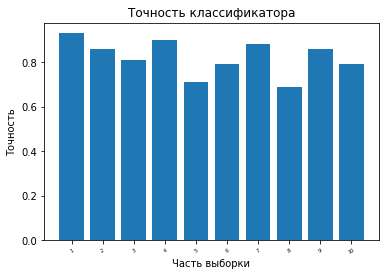

In [34]:
label = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
no_movies = accuracies
index = np.arange(len(label))
plt.bar(index, no_movies)
plt.xlabel('Часть выборки')
plt.ylabel('Точность')
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('Точность классификатора')
plt.show()

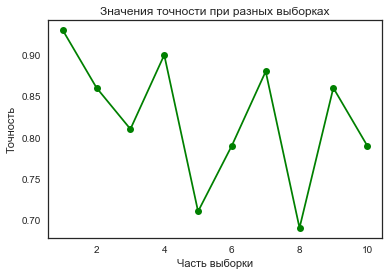

In [70]:
plt.plot([1,2,3,4,5,6,7,8,9,10], accuracies, '-go')
plt.title("Значения точности при разных выборках")
plt.ylabel('Точность')
plt.xlabel('Часть выборки')
plt.show()

In [52]:
summ_f = 0
summ_s = 0
accuracies = []
shapes = []
for x in range(10):
    summ_f = summ_f + nonbest_num[x]
    summ_s = summ_s + best_num[x]
    f = nonbest.iloc[0:summ_f]
    s = best.iloc[0:summ_s]
    r = f.append(s, ignore_index=True)
    print(r.shape)
    shapes.append(r.shape[0])
    acc = count_accuracy2(r)
    accuracies.append(acc)

(211, 20)
(422, 20)
(633, 20)
(844, 20)
(1055, 20)
(1266, 20)
(1477, 20)
(1688, 20)
(1899, 20)
(2118, 20)


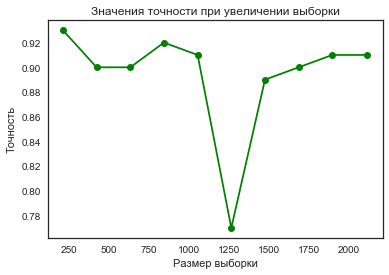

In [54]:
plt.plot(shapes, accuracies, '-go')
plt.title("Значения точности при увеличении выборки")
plt.ylabel('Точность')
plt.xlabel('Размер выборки')
plt.show()

In [ ]:
summ_f = 0
summ_s = 0
accuracies = []
for x in range(10):
    summ_f = summ_f + nonbest_num[x]
    summ_s = summ_s + best_num[x]
    f = nonbest.iloc[0:summ_f]
    s = best.iloc[0:summ_s]
    r = f.append(s, ignore_index=True)
    print(r.shape)
    acc = count_accuracy2(r)
    accuracies.append(acc)

In [223]:
best_num = [8]*20
best_num.append(9)
print(sum(best_num))
nonbest_num = [93]*20
nonbest_num.append(89)
print(sum(nonbest_num))

169
1949


In [178]:
summ_f = 0
summ_s = 0
accuracies = []
for x in range(22):
    summ_f = summ_f + nonbest_num[x]
    summ_s = summ_s + best_num[x]
    f = nonbest.iloc[0:summ_f]
    s = best.iloc[0:summ_s]
    r = f.append(s, ignore_index=True)
    print(r.shape)
    acc = count_accuracy(r)
    accuracies.append(acc)

101
202
303
404
505
606
707
808
909
1010
1111
1212
1313
1414
1515
1616
1717
1818
1919
2020
2118


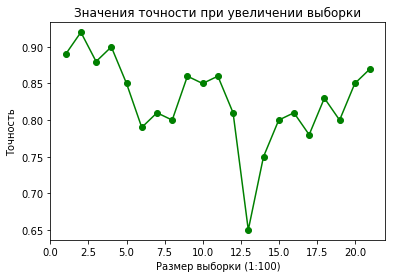

In [181]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21], accuracies, '-go')
plt.title("Значения точности при увеличении выборки")
plt.ylabel('Точность')
plt.xlabel('Размер выборки (1:100)')
plt.show()

In [225]:
summ_f = 0
summ_s = 0
accuracies = []
for x in range(21):
    summ_f = summ_f + nonbest_num[x]
    summ_s = summ_s + best_num[x]
    f = nonbest.iloc[0:summ_f]
    s = best.iloc[0:summ_s]
    r = f.append(s, ignore_index=True)
    print(r.shape)
    acc = count_accuracy2(r)
    accuracies.append(acc)

(101, 20)
(202, 20)
(303, 20)
(404, 20)
(505, 20)
(606, 20)
(707, 20)
(808, 20)
(909, 20)
(1010, 20)
(1111, 20)
(1212, 20)
(1313, 20)
(1414, 20)
(1515, 20)
(1616, 20)
(1717, 20)
(1818, 20)
(1919, 20)
(2020, 20)
(2118, 20)


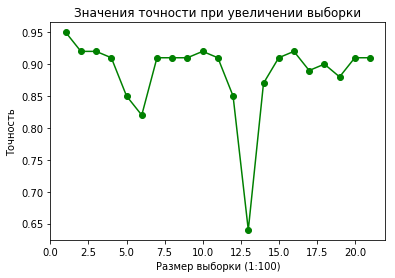

In [226]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21], accuracies, '-go')
plt.title("Значения точности при увеличении выборки")
plt.ylabel('Точность')
plt.xlabel('Размер выборки (1:100)')
plt.show()

# Отдельно по 1 эссе

In [228]:
df1 = df1.drop(['type_ess'], axis=1)
df2 = df2.drop(['type_ess'], axis=1)

In [229]:
best = df1[df1['mark_best_nonbest'] == 'best']
nonbest = df1[df1['mark_best_nonbest'] == 'nonbest']

In [230]:
best.shape

(76, 20)

In [231]:
nonbest.shape

(980, 20)

In [240]:
best_num = [5]*14
best_num.append(6)
print(sum(best_num))
nonbest_num = [65]*14
nonbest_num.append(70)
print(sum(nonbest_num))

76
980


In [244]:
summ_f = 0
summ_s = 0
accuracies = []
for x in range(15):
    summ_f = summ_f + nonbest_num[x]
    summ_s = summ_s + best_num[x]
    f = nonbest.iloc[0:summ_f]
    s = best.iloc[0:summ_s]
    r = f.append(s, ignore_index=True)
    print(r.shape)
    acc = count_accuracy(r)
    accuracies.append(acc)

(70, 20)
(140, 20)
(210, 20)
(280, 20)
(350, 20)
(420, 20)
(490, 20)
(560, 20)
(630, 20)
(700, 20)
(770, 20)
(840, 20)
(910, 20)
(980, 20)
(1056, 20)


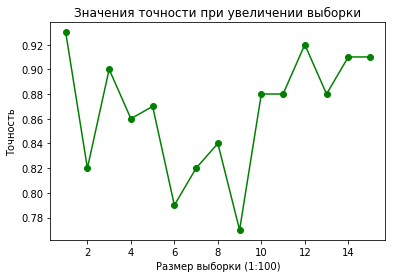

In [246]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], accuracies, '-go')
plt.title("Значения точности при увеличении выборки")
plt.ylabel('Точность')
plt.xlabel('Размер выборки (1:100)')
plt.show()

In [247]:
summ_f = 0
summ_s = 0
accuracies = []
for x in range(15):
    summ_f = summ_f + nonbest_num[x]
    summ_s = summ_s + best_num[x]
    f = nonbest.iloc[0:summ_f]
    s = best.iloc[0:summ_s]
    r = f.append(s, ignore_index=True)
    print(r.shape)
    acc = count_accuracy2(r)
    accuracies.append(acc)

(70, 20)
(140, 20)
(210, 20)
(280, 20)
(350, 20)
(420, 20)
(490, 20)
(560, 20)
(630, 20)
(700, 20)
(770, 20)
(840, 20)
(910, 20)
(980, 20)
(1056, 20)


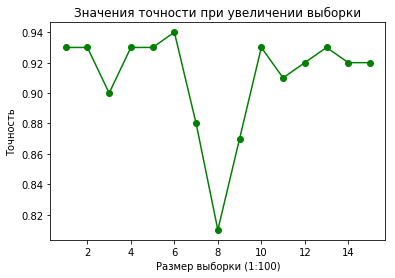

In [248]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], accuracies, '-go')
plt.title("Значения точности при увеличении выборки")
plt.ylabel('Точность')
plt.xlabel('Размер выборки (1:100)')
plt.show()

# Отдельно по 2 эссе

In [249]:
best = df2[df2['mark_best_nonbest'] == 'best']
nonbest = df2[df2['mark_best_nonbest'] == 'nonbest']

In [250]:
best.shape

(93, 20)

In [251]:
nonbest.shape

(969, 20)

In [262]:
best_num = [5]*17
best_num.append(8)
print(sum(best_num))
nonbest_num = [54]*17
nonbest_num.append(51)
print(sum(nonbest_num))

93
969


In [264]:
summ_f = 0
summ_s = 0
accuracies = []
for x in range(18):
    summ_f = summ_f + nonbest_num[x]
    summ_s = summ_s + best_num[x]
    f = nonbest.iloc[0:summ_f]
    s = best.iloc[0:summ_s]
    r = f.append(s, ignore_index=True)
    print(r.shape)
    acc = count_accuracy(r)
    accuracies.append(acc)

(59, 20)
(118, 20)
(177, 20)
(236, 20)
(295, 20)
(354, 20)
(413, 20)
(472, 20)
(531, 20)
(590, 20)
(649, 20)
(708, 20)
(767, 20)
(826, 20)
(885, 20)
(944, 20)
(1003, 20)
(1062, 20)


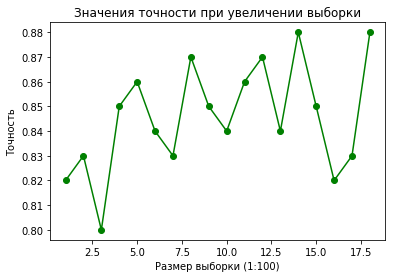

In [265]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], accuracies, '-go')
plt.title("Значения точности при увеличении выборки")
plt.ylabel('Точность')
plt.xlabel('Размер выборки (1:100)')
plt.show()

In [266]:
summ_f = 0
summ_s = 0
accuracies = []
for x in range(18):
    summ_f = summ_f + nonbest_num[x]
    summ_s = summ_s + best_num[x]
    f = nonbest.iloc[0:summ_f]
    s = best.iloc[0:summ_s]
    r = f.append(s, ignore_index=True)
    print(r.shape)
    acc = count_accuracy2(r)
    accuracies.append(acc)

(59, 20)
(118, 20)
(177, 20)
(236, 20)
(295, 20)
(354, 20)
(413, 20)
(472, 20)
(531, 20)
(590, 20)
(649, 20)
(708, 20)
(767, 20)
(826, 20)
(885, 20)
(944, 20)
(1003, 20)
(1062, 20)


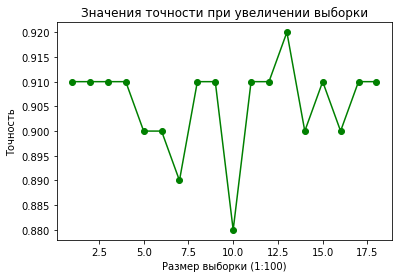

In [267]:
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], accuracies, '-go')
plt.title("Значения точности при увеличении выборки")
plt.ylabel('Точность')
plt.xlabel('Размер выборки (1:100)')
plt.show()